In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
from fastai.conv_learner import *
from fastai.dataset import *
from fastai.models.resnet import vgg_resnet50

import json
from glob import glob
import shutil
import imageio

In [4]:
torch.backends.cudnn.benchmark=True

In [9]:
ALL_PATH = Path('../data/all/')
seg_files = glob(str(ALL_PATH/'CameraSeg*/*.png'))

In [10]:
seg_files[:10]

['../data/all/CameraSeg-150/F65-98.png',
 '../data/all/CameraSeg-150/c4_episode_0001_000190.png',
 '../data/all/CameraSeg-150/c2_episode_0001_000080.png',
 '../data/all/CameraSeg-150/c4_episode_0009_000068.png',
 '../data/all/CameraSeg-150/c4_episode_0005_000170.png',
 '../data/all/CameraSeg-150/c4_episode_0015_000160.png',
 '../data/all/CameraSeg-150/c5_episode_0017_000174.png',
 '../data/all/CameraSeg-150/c2_episode_0017_000158.png',
 '../data/all/CameraSeg-150/c4_episode_0019_000088.png',
 '../data/all/CameraSeg-150/c4_episode_0004_000210.png']

In [11]:
result = imageio.imread(seg_files[0])

In [23]:
a = preprocess_labels(result)

In [27]:
a.shape

(150, 200, 3)

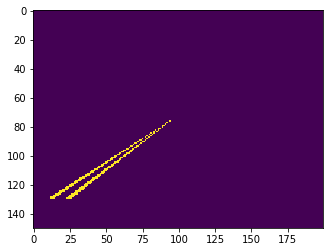

In [28]:
plt.imshow(a[:,:,0])

In [22]:
def preprocess_labels(label_image):
    labels_new = np.zeros_like(label_image)
    # Identify lane marking pixels (label is 6)
    lane_marking_pixels = (label_image[:,:,0] == 6).nonzero()
    # Set lane marking pixels to road (label is 7)
    labels_new[lane_marking_pixels] = 7

    # Identify all vehicle pixels
    vehicle_pixels = (label_image[:,:,0] == 10).nonzero()
    # Isolate vehicle pixels associated with the hood (y-position > 496)
    hood_indices = (vehicle_pixels[0] >= 496).nonzero()[0]
    hood_pixels = (vehicle_pixels[0][hood_indices], \
                   vehicle_pixels[1][hood_indices])
    # Set hood pixel labels to 0
    labels_new[hood_pixels] = 0
    # Return the preprocessed label image 
    return labels_new

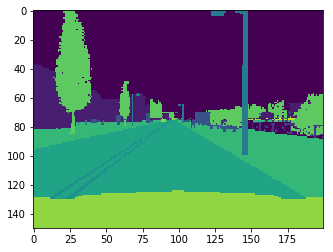

In [17]:
plt.imshow(result[:,:,0])

In [12]:
result.shapea

(150, 200, 3)

In [16]:
for f in seg_files:
    f_pt = Path(f).parts
    
    targ_path = SEG_PATH/f_pt[-2].replace('Camera', 'Fmt')/f_pt[-1]
    print(targ_path)
    break
#     shutil.copy2(f, str(targ_path))

../data/all/FmtSeg-150/F65-98.png


### Moving data to sample

In [ ]:
TEST_PATH = Path('../data/test_sync')
TARG_PATH = Path('../data/sample_test_sync')
TARG_PATH.mkdir(exist_ok=True)
(TARG_PATH/f'CameraSeg').mkdir(exist_ok=True)
(TARG_PATH/f'CameraRGB').mkdir(exist_ok=True)
(TARG_PATH/f'CameraSeg-150').mkdir(exist_ok=True)
(TARG_PATH/f'CameraRGB-150').mkdir(exist_ok=True)
(TARG_PATH/f'CameraSeg-300').mkdir(exist_ok=True)
(TARG_PATH/f'CameraRGB-300').mkdir(exist_ok=True)

source = glob(str(DATA_PATH/'*/*.png'))
for f in source:
    f_pt = Path(f).parts
    fn = f_pt[-1]
    skip = int(fn[-5])%3 != 0
    if skip: continue
    targ_path = TARG_PATH/f_pt[-2]/f_pt[-1]
    shutil.copy2(f, str(targ_path))

## Data

In [29]:
TEST_PATH = Path('../data/test_sync')

In [30]:
TRAIN_DN = 'CameraRGB'
MASKS_DN = 'CameraSeg'

In [31]:
(TEST_PATH/TRAIN_DN).mkdir(exist_ok=True)
(TEST_PATH/MASKS_DN).mkdir(exist_ok=True)

In [32]:
def show_img(im, figsize=None, ax=None, alpha=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, alpha=alpha)
    ax.set_axis_off()
    return ax

### Resize images

In [39]:
TRAIN_DN = 'CameraRGB'
MASKS_DN = 'CameraSeg'
sz = 300
ratio = 4/3

In [40]:
(TEST_PATH/f'{MASKS_DN}-{sz}').mkdir(exist_ok=True)

In [41]:
def resize_mask(fn):
    Image.open(fn).resize((int(sz*ratio),sz)).save((fn.parent.parent)/f'{MASKS_DN}-{sz}'/fn.name)

files = list((TEST_PATH/MASKS_DN).iterdir())
with ThreadPoolExecutor(8) as e: e.map(resize_mask, files)

In [42]:
(TEST_PATH/f'{TRAIN_DN}-{sz}').mkdir(exist_ok=True)

In [43]:
def resize_img(fn):
    Image.open(fn).resize((int(sz*ratio),sz)).save((fn.parent.parent)/f'{TRAIN_DN}-{sz}'/fn.name)

files = list((TEST_PATH/TRAIN_DN).iterdir())
with ThreadPoolExecutor(8) as e: e.map(resize_img, files)

In [44]:
len(glob(str(TEST_PATH/(TRAIN_DN+'-150')/'*.png'))), len(glob(str(TEST_PATH/(MASKS_DN+'-300')/'*.png')))

(1000, 1000)

### View Data

In [19]:
pths = glob(str(TEST_PATH/(TRAIN_DN)/'*.png'))

In [20]:
pth = pths[0]

In [21]:
plt.imread(str(pth)).shape

(600, 800, 3)

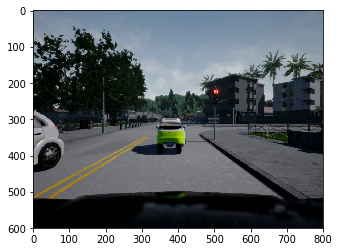

In [22]:
plt.imshow(plt.imread(str(pth)))